In [17]:
import numpy as np
import matplotlib.pyplot as plt

Les hématies (globules rouges) dans le sang tendent à former des agglomérats, ce qui indique la présence de forces d'interaction attractives. On modélise ces phénomènes de façon très simplifiée, dans la dimension 1: De population (N+2) hématies sur l'intervalle [0,1] et chacune subissant l'influence de ses deux voisines, sauf la première et la dernière qui seront supposé fixées en 0 et en 1:
$$0=x_0<x_1(t)<...<x_N(t)<x_{N+1}=1$$
On considère une force d'interaction qui est attractive quand la distance de 2 particues est assez grande, et vers 0 si cette distance tend vers $+\infty$. On note $a$ leur longeur caractéristique et la fonction
$$\phi(d)=\frac{\gamma}{d}ln\left(\frac{d}{a}\right)$$
Pour 2 particules voisines en $x_i$ et $x_{i+1}$, $\phi(x_{i+1}-x_i)$ représente la force exercée par la particule (i+1) sur la particule i et l'opposée de la force exercée par i sur (i+1).
On suppose aussi que chaque particule subit du fluide environnat une force de frottement proportionnelle à sa vitesse et qui s'oppose au mouvement. Le système dynamique peut s'écrire:
$$x^{''}_i=\phi(x_{i+1}-x_i)-\phi(x_{i}-x_{i-1})-\lambda x'_i$$
On en déduit que
$$\frac{d}{dt}\left(\sum_{i=1}^N \frac{1}{2}(x'_i)^2+\sum_0^N\psi(x_{i+1}-x_i)\right)=-\lambda \sum_1^N(x'_i)^2,$$
d'où $\psi$ est une primitive de $\phi$.

### 1. Solution numérique
Notons $X(t)=(x_i(t))_{i=1,...,N}$ et $\Phi (X)=\left(\Phi_i(X)=\phi(x_{i+1}-x_i)-\phi(x_i-x_{i-1})\right)_{i=1,...,N}$, on obtient l'équation
$$X''=\Phi (X)-\lambda X'$$
On prend $N=49$ et le vecteur initial $X=(X_1,..., X_N)$ défini par 
$$X_i=(i+0.1\rho_i).h,$$
d'où $h=1/50$ et $\rho_i$ est une réalisation d'une variable aléatoire de loi uniforme sur [-1,1].

In [18]:
#paramètres
K=1500
h=0.002
T=3
N=49
gamma=0.5
lamda=10
a=0.004

In [19]:
#Fonction phi 
def phi(x):
    return (gamma/x)*np.log(x/a)

In [20]:
#Vecteur initial
def init1(d):
    res=np.zeros(d)
    for i in range(d):
        res[i]=(i+1+0.1*np.random.uniform(-1,1))/(d+1)
    return res

In [21]:
#Fonction grand phi
def Phi(x):
    d=x.size
    var=np.zeros(d+2)
    var[1:-1]=x
    var[d+1]=1
    res=np.zeros(d)
    for i in np.arange(d):
        res[i]=phi(var[i+2]-var[i+1])-phi(var[i+1]-var[i])
    return res

In [22]:
def fonc(x):
    return np.concatenate([x[N:], Phi(x[:N])-lamda*x[N:]], axis=0)

In [23]:
#Méthode Euler explicite
def Eul_Ex(F,ini,t,k):
    d=ini.size
    dt=t/k
    res=np.zeros((k,d))
    res[0,:]=ini
    for i in range(k-1):
        res[i+1,:]=res[i,:]+dt*F(res[i,:])
    return res

In [24]:
def itere(x0,x1):
    dt=0.002
    n=len(x0)
    res=np.zeros((K,n))
    res[0,:]=x0
    res[1,:]=x1
    for i in np.arange(1,K-1,1):
        res[i+1,:]=(2-lamda*dt)*res[i,:]+dt**2*Phi(res[i,:])-(1-lamda*dt)*res[i-1,:]
    return res

In [25]:
x0=init1(N)
sol2=itere(x0,x0)

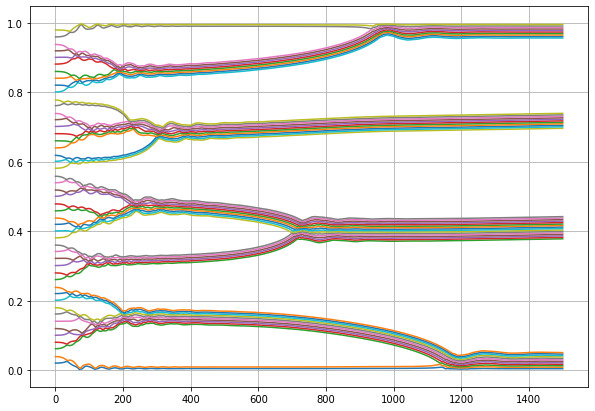

In [26]:
t=np.linspace(0,1500,1500)
plt.figure(figsize=(10,7))
plt.grid(True)
for i in range(49):
    plt.plot(t, sol2[:,i])